<a href="https://colab.research.google.com/github/rushi-k12/Forcecasting/blob/main/Superstore_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot
import seaborn as sns

In [5]:
df=pd.read_csv("/content/Sample - Superstore.csv", index_col='Order Date',encoding='latin1')

In [6]:
df.shape

(9994, 20)

In [7]:
#plot the sales data of furniture
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum})
df.sort_index(inplace=True)
df.head(4)

,Sales
Order Date,
1/1/2017,975.490
1/10/2014,51.940
1/10/2015,1018.104
1/10/2016,104.770


In [9]:
# Load your dataset with the correct encoding if needed
df = pd.read_csv('/content/Sample - Superstore.csv', encoding='ISO-8859-1')

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

# Set 'Order Date' as the index
df.set_index('Order Date', inplace=True)

# Display the dataframe to verify the changes
print("DataFrame with 'Order Date' as index:")
print(df.head())

# Convert index to the desired date format
df.index = df.index.strftime('%Y-%m-%d')

# Display the dataframe to verify the changes
print("\nDataFrame with 'Order Date' in the desired format:")
print(df.head())

# Aggregate sales by date (sum if there are multiple entries for the same date)
df_aggregated = df.groupby(df.index).sum()

# Display the aggregated dataframe
print("\nAggregated DataFrame:")
print(df_aggregated.head())

# Save to a new CSV if needed
df_aggregated.to_csv('/content/aggregated_sales_data.csv')

DataFrame with 'Order Date' as index:
            Row ID        Order ID   Ship Date       Ship Mode Customer ID  \
Order Date                                                                   
2016-11-08       1  CA-2016-152156  11/11/2016    Second Class    CG-12520   
2016-11-08       2  CA-2016-152156  11/11/2016    Second Class    CG-12520   
2016-06-12       3  CA-2016-138688   6/16/2016    Second Class    DV-13045   
2015-10-11       4  US-2015-108966  10/18/2015  Standard Class    SO-20335   
2015-10-11       5  US-2015-108966  10/18/2015  Standard Class    SO-20335   

              Customer Name    Segment        Country             City  \
Order Date                                                               
2016-11-08      Claire Gute   Consumer  United States        Henderson   
2016-11-08      Claire Gute   Consumer  United States        Henderson   
2016-06-12  Darrin Van Huff  Corporate  United States      Los Angeles   
2015-10-11   Sean O'Donnell   Consumer  Unite

In [12]:
df = pd.read_csv("/content/aggregated_sales_data.csv")

In [13]:
#plot the sales data of furniture
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum})
df.sort_index(inplace=True)
df.head(4)

,Sales
Order Date,
2014-01-11,9.940
2014-01-14,61.960
2014-01-21,25.248
2014-01-31,290.666


In [15]:
# Load your dataset with the correct encoding if needed
df = pd.read_csv('/content/Sample - Superstore.csv', encoding='ISO-8859-1')

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

# Set 'Order Date' as the index
df.set_index('Order Date', inplace=True)

# Display the dataframe to verify the changes
print("DataFrame with 'Order Date' as index:")
print(df.head())

# Resample the data on a monthly level
df_resampled = df.resample('MS').sum()

# Display the resampled dataframe
print("\nResampled DataFrame on a monthly level:")
print(df_resampled.head())

# Save to a new CSV if needed
df_resampled.to_csv('/content/resampled_sales_data.csv')

DataFrame with 'Order Date' as index:
            Row ID        Order ID   Ship Date       Ship Mode Customer ID  \
Order Date                                                                   
2016-11-08       1  CA-2016-152156  11/11/2016    Second Class    CG-12520   
2016-11-08       2  CA-2016-152156  11/11/2016    Second Class    CG-12520   
2016-06-12       3  CA-2016-138688   6/16/2016    Second Class    DV-13045   
2015-10-11       4  US-2015-108966  10/18/2015  Standard Class    SO-20335   
2015-10-11       5  US-2015-108966  10/18/2015  Standard Class    SO-20335   

              Customer Name    Segment        Country             City  \
Order Date                                                               
2016-11-08      Claire Gute   Consumer  United States        Henderson   
2016-11-08      Claire Gute   Consumer  United States        Henderson   
2016-06-12  Darrin Van Huff  Corporate  United States      Los Angeles   
2015-10-11   Sean O'Donnell   Consumer  Unite

In [16]:
df=pd.read_csv("/content/resampled_sales_data.csv")

[Text(0, 0.5, 'Total Monthly Sales of Furniture')]

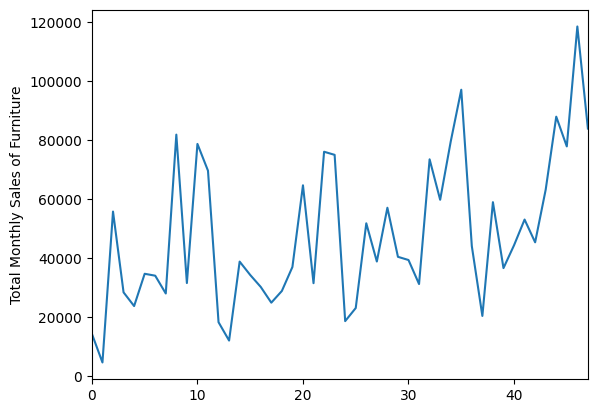

In [17]:
ax = df['Sales'].plot()
ax.autoscale(axis='x', tight=True)
ax.set(ylabel='Total Monthly Sales of Furniture')

In [20]:
import seasonal

In [21]:
def seasonal_period_udf(counts):

    seasons, trend = seasonal.fit_seasons(counts, trend="spline")
    if (seasons is not None): return len(seasons)
    else: return -1

In [22]:
seasonal_period_udf(df['Sales'].values)

12

In [23]:
from statsmodels.tsa.filters.hp_filter import hpfilter

#get the values
sales_cycle, sales_trend = hpfilter(df['Sales'], lamb=1200)

In [24]:
sales_cycle

0    -13333.127105
1    -24445.216669
2     25341.924706
3     -3395.122027
4     -9330.606184
5       393.957784
6     -1389.935466
7     -8454.260476
8     44515.777891
9     -6547.623610
10    40038.403794
11    30513.362229
12   -21188.938916
13   -27692.760253
14    -1193.408646
15    -6015.129057
16   -10404.375843
17   -16114.390751
18   -12578.051217
19    -4925.559317
20    22260.422282
21   -11451.427754
22    32589.392589
23    31016.396581
24   -25888.049133
25   -22026.777208
26     6068.992776
27    -7604.616911
28     9853.511503
29    -7639.996026
30    -9650.810803
31   -18804.384168
32    22411.772578
33     7562.391657
34    26115.129814
35    42484.266298
36   -11831.640546
37   -36919.658732
38       54.860428
39   -24090.195695
40   -18361.062447
41   -11865.676314
42   -22006.290092
43    -6744.595018
44    15279.859651
45     2392.850050
46    40228.327298
47     2772.086474
Name: Sales_cycle, dtype: float64

In [25]:
type(sales_cycle)


pandas.core.series.Series

In [26]:
sales_trend

0     27570.022105
1     28965.108669
2     30349.084294
3     31690.467027
4     32978.893184
5     34201.169816
6     35336.328466
7     36363.728976
8     37261.572909
9     38001.016610
10    38590.312906
11    39032.258271
12    39363.014516
13    39644.171253
14    39919.660646
15    40210.337557
16    40536.062343
17    40911.682751
18    41343.376217
19    41823.891517
20    42335.495718
21    42856.351254
22    43383.170911
23    43903.124619
24    44430.540133
25    45005.592208
26    45646.882224
27    46354.655911
28    47134.216497
29    47984.530026
30    48912.773803
31    49919.758468
32    50998.252322
33    52125.353343
34    53296.835986
35    54514.776702
36    55803.014546
37    57220.792132
38    58817.492372
39    60611.731795
40    62622.172647
41    64847.402014
42    67270.706092
43    69865.483018
44    72586.792349
45    75384.073150
46    78219.497702
47    81057.232326
Name: Sales_trend, dtype: float64

In [27]:
df['Trend'] = sales_trend

In [28]:
df.head(4)

,Order Date,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Trend
0,2014-01-01,346176,CA-2014-103800CA-2014-112326CA-2014-112326CA-2...,1/7/20141/8/20141/8/20141/8/20141/12/20141/8/2...,Standard ClassStandard ClassStandard ClassStan...,DP-13000PO-19195PO-19195PO-19195MB-18085LS-172...,Darren PowersPhillina OberPhillina OberPhillin...,ConsumerHome OfficeHome OfficeHome OfficeConsu...,United StatesUnited StatesUnited StatesUnited ...,HoustonNapervilleNapervilleNapervillePhiladelp...,...,CentralCentralCentralCentralEastWestSouthSouth...,OFF-PA-10000174OFF-LA-10003223OFF-ST-10002743O...,Office SuppliesOffice SuppliesOffice SuppliesO...,PaperLabelsStorageBindersArtPaperArtChairsBind...,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",14236.895,284,10.00,2450.1907,27570.022105
1,2014-02-01,272235,CA-2014-140795CA-2014-139857CA-2014-123400CA-2...,2/3/20142/6/20142/9/20142/9/20142/6/20142/6/20...,First ClassStandard ClassStandard ClassStandar...,BD-11500CD-12790EB-13930EB-13930TB-21400TB-214...,Bradley DruckerCynthia DelaneyEric BarretoEric...,ConsumerHome OfficeConsumerConsumerConsumerCon...,United StatesUnited StatesUnited StatesUnited ...,Green BaySan DiegoSaint PetersburgSaint Peters...,...,CentralWestSouthSouthWestWestWestWestWestSouth...,TEC-AC-10001432OFF-FA-10001843OFF-BI-10000666T...,TechnologyOffice SuppliesOffice SuppliesTechno...,AccessoriesFastenersBindersPhonesBindersBinder...,Enermax Aurora Lite KeyboardStaplesSurelock Po...,4519.892,159,8.10,862.3084,28965.108669
2,2014-03-01,871575,CA-2014-104269US-2014-143707CA-2014-113880CA-2...,3/6/20143/5/20143/5/20143/5/20143/5/20143/5/20...,Second ClassStandard ClassStandard ClassStanda...,DB-13060HR-14770VF-21715VF-21715SC-20380SC-203...,Dave BrooksHallie RedmondVicky FreymannVicky F...,ConsumerHome OfficeHome OfficeHome OfficeConsu...,United StatesUnited StatesUnited StatesUnited ...,SeattleNew York CityElmhurstElmhurstEl PasoEl ...,...,WestEastCentralCentralCentralCentralCentralCen...,FUR-CH-10004063TEC-PH-10003655FUR-CH-10000863O...,FurnitureTechnologyFurnitureOffice SuppliesOff...,ChairsPhonesChairsPaperFastenersChairsFurnishi...,Global Deluxe High-Back Manager's ChairSannysi...,55691.009,585,26.30,498.7299,30349.084294
3,2014-04-01,690625,US-2014-157021US-2014-157021CA-2014-138359CA-2...,4/6/20144/6/20144/6/20144/6/20144/8/20144/8/20...,Second ClassSecond ClassStandard ClassStandard...,KM-16720KM-16720KH-16330KH-16330RD-19585RD-195...,Kunst MillerKunst MillerKatharine HarmsKathari...,ConsumerConsumerCorporateCorporateConsumerCons...,United StatesUnited StatesUnited StatesUnited ...,VallejoVallejoRevereRevereAthensAthensAthensHo...,...,WestWestEastEastSouthSouthSouthCentralCentralS...,OFF-LA-10002312OFF-BI-10000042OFF-ST-10000636O...,Office SuppliesOffice SuppliesOffice SuppliesO...,LabelsBindersStorageBindersPaperPhonesApplianc...,"Avery 490Pressboard Data Binder, Crimson, 12"" ...",28295.345,536,14.85,3488.8352,31690.467027


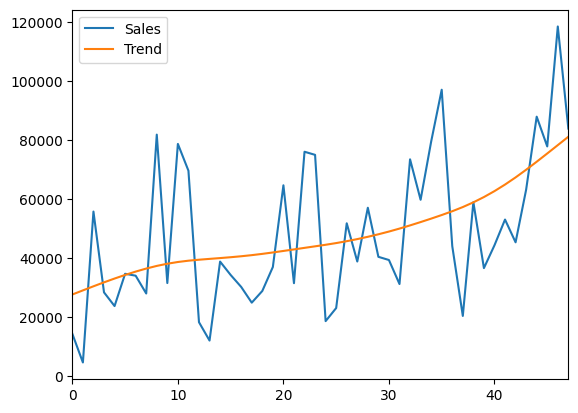

In [29]:
df[['Sales', 'Trend']].plot().autoscale(axis='x', tight=True)

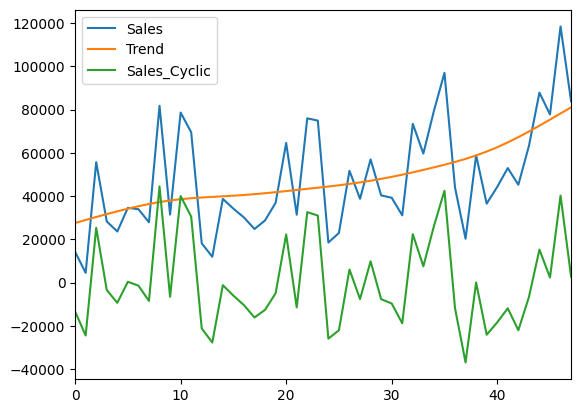

In [30]:
df['Sales_Cyclic'] = sales_cycle

df[['Sales', 'Trend', 'Sales_Cyclic']].plot().autoscale(axis='x', tight=True)